In [1]:
import numpy as np

import matplotlib.pyplot as plt

import math

from scipy.optimize import curve_fit

#from scipy.constants import g



# set random seed

np.random.seed(4132)



# define initial state

state_0 = np.random.randint(0,16,size=20)



for i in np.arange(0,19):

    state_0[i] = 20



state_r = np.random.randint(0,16,size=20)



# lock end beads in the middle

state_0[0]  = 20

state_0[19] = 20

initial = np.copy(state_0)

random8 = np.copy(state_r)



# define mass of beads, spring constant, gravitational acceleration

#m = 2.5

m = 0.0872#.0235

k = 0.9#.5

g = 9.81





# define move function

# the argument is the indexed state array not the entire array

def move(state):

    # random move up or down by 1

    randval = np.random.random()

    if randval < 0.5:

        new_state = state + 1

    else:

        new_state = state - 1



    return new_state



# define cost function

# total energy of the system of hanging masses and springs

def E(state):

    # grav potential energy

    Egrav = m * g * state.sum()



    # elastic potential energy

    Eelastic = 0

    for i in range(state.size-1):

        Eelastic += 0.5 * k * (np.abs(state[i]-state[i+1]))**2



    return Egrav + Eelastic



# define function for simulated annealing

def anneal(state, T0, Tf):

    # set temperature for each iteration of moves

    T = T0

    # initialize temperature and total energy lists

    T_list = []

    E_list = []

    while T > Tf:

        T_list.append(T)

        E_list.append(E(state))

        # move beads ***NOT THE FIXED ENDS***

        for i in range(1, len(state)-1):

            # calculate initial energy of state

            E_0 = E(state)



            # copy state array to check energy of new possible state

            copy_state = np.copy(state)



            # get new state

            new_state = move(state[i])

            copy_state[i] = new_state



            # determine acceptance of the move

            # calculate energy of new_state

            E_f = E(copy_state)



            if E_f < E_0:

                state[i] = new_state



            else:

                prob = np.random.random()

                if prob < np.exp(-abs(E_f - E_0)/T):

                    state[i] = new_state

                else:

                    state[i] = state[i]



        # decrease T

        T = 0.995*T



    return state, T_list, E_list



# do the annealing starting with a random state

state_f, T_list, E_list = anneal(state_0, 500, .00001)

#state_f, T_list, E_list = anneal(state_r, 500, .00001)





'''

fit the positions of the necklace with an actual catenary

using the cosh function

'''



def catenary(x, a, b):

    return a * np.cosh((x-9.5)*b/a)-100



x_data = np.zeros(20)



for i in range(x_data.size):

    x_data[i] = i



popt, pcov = curve_fit(catenary, x_data, state_f, [.03, .05], maxfev=4000)



y_catenary = catenary(x_data, *popt)

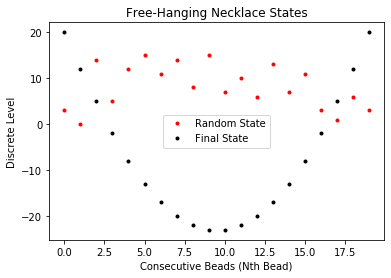

In [7]:
import matplotlib.pyplot as plt
plt.figure(1)

# plot necklace

#cs = {'fontname':'Times New Roman'}

#plt.plot(initial, '.b', label = 'Initial State')

plt.plot(random8, '.r', label = 'Random State')

plt.plot(state_f, '.k', label = 'Final State')

plt.title('Free-Hanging Necklace States')

plt.xlabel("Consecutive Beads (Nth Bead)")

plt.ylabel("Discrete Level")

plt.legend()

#plt.grid("on")

plt.show()

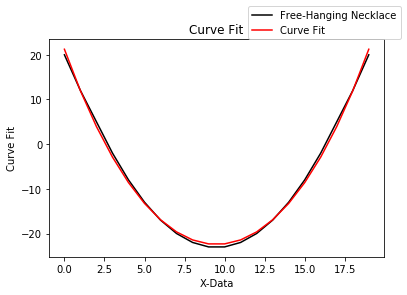

In [5]:
plt.figure(2)

# plot necklace with catenary fit

plt.plot(state_f, color='k', label='Free-Hanging Necklace')

plt.plot(y_catenary, color='r', label = 'Curve Fit')

plt.title('Curve Fit')

plt.xlabel("X-Data")

plt.ylabel("Curve Fit")

plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.)

#plt.grid("on")

plt.show()

#plt.savefig('fit_necklace')

#plt.close()

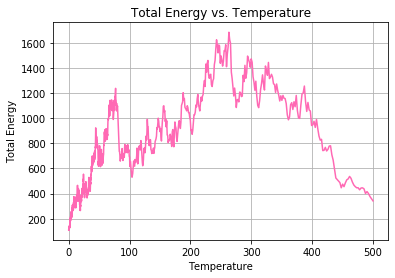

In [3]:
plt.figure(3)

# plot energy vs temperature

plt.plot(T_list, E_list, color='#ff69b4')

plt.title('Total Energy vs. Temperature')

plt.xlabel('Temperature')

plt.ylabel('Total Energy')

plt.grid("on")

plt.show()

#plt.savefig('E_v_T')

#plt.close()


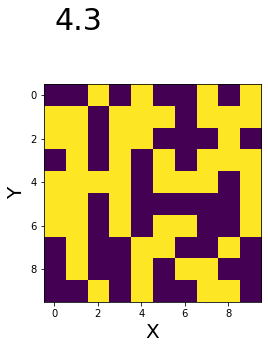

In [1]:
#Import the libraries

import pandas as pd
import numpy as np

#Create a 50 x 50 spin lattice of all up spins to represent a ferromagnetic system
#50
N = 16

initial_spins_df = pd.DataFrame(np.ones((N, N)))
initial_spins_df


initial_spins_melted = pd.melt(initial_spins_df.reset_index(level=0),id_vars=["index"])
initial_spins_melted.columns = ["X","Y","spin_value"]
initial_spins_melted.reset_index(inplace=True)
initial_spins_melted.set_index(["X", "Y"],inplace=True)


initial_spins_melted.head()

# Create a column for the 4 neighboring spins for each particular spin

initial_spins_melted["right_spin"] = initial_spins_melted.groupby('Y')["index"].shift(-1)
initial_spins_melted["left_spin"] = initial_spins_melted.groupby('Y')["index"].shift(1)
initial_spins_melted["up_spin"] = initial_spins_melted.groupby('X')["index"].shift(1)
initial_spins_melted["down_spin"] = initial_spins_melted.groupby('X')["index"].shift(-1)

# Sort the index

initial_spins_melted.sort_index(inplace=True)

# Fill in the null values with with the boundary conditions 
#49
initial_spins_melted.loc[(0),"left_spin"] = np.array(initial_spins_melted["index"][15])
initial_spins_melted.loc[(15),"right_spin"] = np.array(initial_spins_melted["index"][0])
initial_spins_melted.loc[(slice(None),0),"up_spin"]  = np.array(initial_spins_melted["index"][:,15])
initial_spins_melted.loc[(slice(None),15),"down_spin"] = np.array(initial_spins_melted["index"][:,0])

# Make sure the spin values are integer values

initial_spins_melted["right_spin"]= initial_spins_melted["right_spin"].astype(int)
initial_spins_melted["left_spin"] = initial_spins_melted["left_spin"].astype(int)
initial_spins_melted["up_spin"]   = initial_spins_melted["up_spin"].astype(int)
initial_spins_melted["down_spin"] = initial_spins_melted["down_spin"].astype(int)

# Get X and Y coordinate into the dataframe and reset the index

initial_spins_melted.reset_index(inplace=True)
initial_spins_melted.set_index("index", inplace=True)

initial_spins_melted.head()


def initialize_spin_lattice(N):
    initial_spins_df = pd.DataFrame(np.ones((N, N)))
    
    initial_spins_melted = pd.melt(initial_spins_df.reset_index(level=0),id_vars=["index"])
    initial_spins_melted.columns = ["X","Y","spin_value"]
    initial_spins_melted.reset_index(inplace=True)
    initial_spins_melted.set_index(["X", "Y"],inplace=True)
    
    initial_spins_melted["right_spin"] = initial_spins_melted.groupby('Y')["index"].shift(-1)
    initial_spins_melted["left_spin"] = initial_spins_melted.groupby('Y')["index"].shift(1)
    initial_spins_melted["up_spin"] = initial_spins_melted.groupby('X')["index"].shift(1)
    initial_spins_melted["down_spin"] = initial_spins_melted.groupby('X')["index"].shift(-1)
    
    initial_spins_melted.sort_index(inplace=True)
    
    initial_spins_melted.loc[(0),"left_spin"] = np.array(initial_spins_melted["index"][N-1])
    initial_spins_melted.loc[(N-1),"right_spin"] = np.array(initial_spins_melted["index"][0])
    initial_spins_melted.loc[(slice(None),0),"up_spin"]  = np.array(initial_spins_melted["index"][:,N-1])
    initial_spins_melted.loc[(slice(None),N-1),"down_spin"] = np.array(initial_spins_melted["index"][:,0])
    
    initial_spins_melted["right_spin"]= initial_spins_melted["right_spin"].astype(int)
    initial_spins_melted["left_spin"] = initial_spins_melted["left_spin"].astype(int)
    initial_spins_melted["up_spin"]   = initial_spins_melted["up_spin"].astype(int)
    initial_spins_melted["down_spin"] = initial_spins_melted["down_spin"].astype(int)

    initial_spins_melted.reset_index(inplace=True)
    initial_spins_melted.set_index("index", inplace=True)
    
    return initial_spins_melted

#Create delta E function

def deltaE(s,sum_j,h,J):
    return 2*s*(J*sum_j + h)

# Flip function 1: uses vectorized function

def flip(delta,T,k=1):
    if delta <= 0:
        i=-1
    elif np.exp(-delta/(k*T)) > np.random.uniform():
        i=-1
    else:
        i=1
    return i

#vectorize the above functionvflip(y,2.5)
vflip = np.vectorize(flip)
# Flip function 2: uses np.where function

def flip2(delta,T,k=1):
    delta = np.asarray(delta)
    return np.where(np.exp(-delta/(k*T)) > np.random.uniform(),-1,1)
# Generate an array of 20 simulated energies to use as a test
y = np.random.normal(0,2,20)
import timeit
#%timeit vflip(y,2.5)
#%timeit flip2(y,2.5)


def one_step(df,       # the dataframe of the lattice to update
             T,        # the temperature 
             parityX,  # parameter to avoid to choose neighboring spins in the same batch
             parityY,   # parameter to avoid to choose neighboring spins in the same batch
             h=0,      # the external magnetic field
             frac=0.7, # the fraction of spins from the lattice to choose
            ):
    
    # This part of the code is to ensure that spins chosen cannot be neighbors
    sample_spins = df.loc[(df["X"] % 2 == parityX) & (df["Y"] % 2 == parityY)]
    # we sample the resulting data frame
    sample_spins = sample_spins.sample(frac=frac)  
    
    ## sum_j is the 
    
    sum_j = (df.loc[sample_spins["up_spin"], "spin_value"].values+
            df.loc[sample_spins["down_spin"], "spin_value"].values+
            df.loc[sample_spins["left_spin"], "spin_value"].values+
            df.loc[sample_spins["right_spin"], "spin_value"].values)

    s_i = sample_spins["spin_value"]

    delta_E = deltaE(s_i,sum_j,h=h,J=1)
    
    flip_array = flip2(delta_E,T)
    
    df.loc[sample_spins.index, "spin_value"] *= flip_array
    
    ##return flip_array
    ## No need to return anything

## The function to reach thermodynamic equilibrium for each value of T(temperature) and h() given 

def get_to_equilibrium(df,# the dataframe of the lattice to update
                       T,# the temperature 
                       h,# the magnetic field
                       frac=0.8,# the fraction of spins from the lattice to choose
                       iteration=50 #100 the number of iteration of the one_step function
                      ):
    for i in range(iteration):
        
        # we choose at random 0 or 1 to select a sublattice with no neighboring spins
        parity = np.random.choice([0,1], size=2)
        
        # we apply the one_step function
        one_step(df, T, parity[0], parity[1], h, frac)

def compute_energy(df):
    tot = 0
    for i in df.index:
        
        tot = tot + 0.5 * -1 * df["spin_value"].loc[i]*(df["spin_value"].loc[df["right_spin"].loc[i]]+
                                                        df["spin_value"].loc[df["left_spin"].loc[i]]+
                                                        df["spin_value"].loc[df["up_spin"].loc[i]]+
                                                        df["spin_value"].loc[df["down_spin"].loc[i]])
    return tot/len(df)

temperatures = np.linspace(1.3,4.3,40)
#30
spin_lattice = initialize_spin_lattice(10)

## Create a dataframe to capture different equilibrium states for each column of temperature
spin_evolution = pd.DataFrame(index=spin_lattice.index, columns=temperatures)
#30
lattice_size = 10
#1000 
mc_steps = 500  # Number of monte carlo steps

magnetization = np.zeros(len(temperatures))  #create array to hold the magnetization for each temperature
suscept = np.zeros(len(temperatures))        #create array to hold the susceptibility for each temperature
energy = np.zeros(len(temperatures))         #create array to hold the energy for each temperature
specific_heat =  np.zeros(len(temperatures)) #create array to hold the specific heat for each temperature

for i in range(len(temperatures)):   
#30                                   # loop through each temperature
    spin_lattice = initialize_spin_lattice(10)                          # initialize the lattice
    get_to_equilibrium(df = spin_lattice, T = temperatures[i], h = 0)   # get the lattice to equilibrium
    
    spin_evolution.iloc[:,i] = spin_lattice["spin_value"]               # record equilibrium spin values
    
    mag = np.zeros(mc_steps)                        # array to hold the magnetization per monte carlo step
    ener = np.zeros(mc_steps)                       # array to hold the energy per monte carlo step
    for j in range(mc_steps):                       # continue monte carlo algorithm after equilibirum
        parity = np.random.choice([0,1], size=2)    # ensure that no neighboring spins are chosen together
        
        one_step(df=spin_lattice,T=temperatures[i],parityX=parity[0],parityY=parity[1]) # one step function
        
        mag[j] = spin_lattice["spin_value"].mean()       # capture the magnetization and energy per MC step
        ener[j] = compute_energy(spin_lattice)
        
        
    magnetization[i] = np.average(mag)                   # compute magnetization
    suscept[i] = mag.var()/temperatures[i]               # compute susceptibility
    energy[i] = np.average(ener)                         # compute energy (per spin)
    specific_heat[i] = ener.var()/(temperatures[i]**2)   # compute specific heat
    
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


#ig = plt.figure(figsize=(5, 5))


sign = 1
i = len(temperatures) - 1 

spin_lattice["spin_value"] = spin_evolution[temperatures[i]]

im = plt.imshow(spin_lattice.pivot(index="X", columns="Y", values="spin_value").values, animated=True)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
text = plt.text(0, -3, str(temperatures[i]), fontsize=30)

def updatefig(*args):
    global spin_evolution, spin_lattice, temperatures, sign, i
    
    if (i == 0) or (i == len(temperatures) - 1):
         sign *= -1  
    i += 1 * sign

    spin_lattice["spin_value"] = spin_evolution[temperatures[i]]
    data = spin_lattice.pivot(index="X", columns="Y", values="spin_value")
    im.set_array(data)
    text.set_text("T = " + str(temperatures[i]))

    return im,
#frames 100, interval 1000
#ani = animation.FuncAnimation(fig, updatefig, frames=100, interval=1000, blit=True)    

#%matplotlib inline
import matplotlib.pyplot as plt

Tc = 2./ np.log(1. + np.sqrt(2))  # The critical temperature is ~2.26


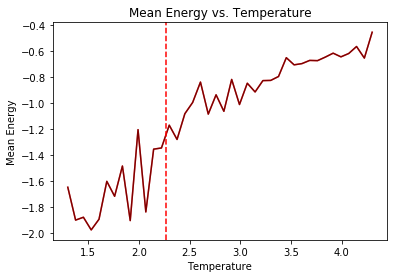

In [22]:
plt.figure()
plt.plot(temperatures,energy,"r")
plt.plot(temperatures,energy,color="k",alpha=0.5)
plt.title("Mean Energy vs. Temperature")
plt.xlabel('Temperature')
plt.ylabel('Mean Energy')
plt.axvline(x=Tc,color='red',ls="--")
plt.show()

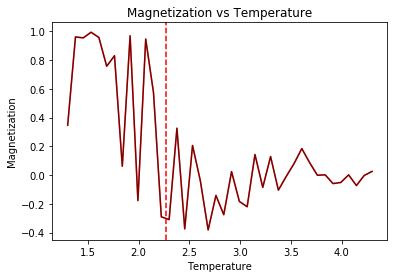

In [23]:
plt.figure()
plt.title('Magnetization vs Temperature')
plt.plot(temperatures,magnetization,"r")
plt.plot(temperatures,magnetization,color="k",alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.axvline(x=Tc,color='red',ls='--')
plt.show()

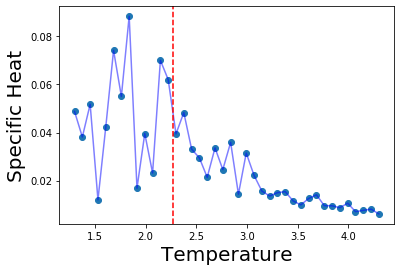

In [4]:
plt.figure()
plt.plot(temperatures,specific_heat,"o")
plt.plot(temperatures,specific_heat,color="blue",alpha=0.5)
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Specific Heat', fontsize=20)
plt.axvline(x=Tc,color='red',ls="--")
plt.show()

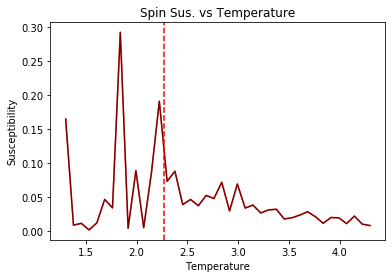

In [26]:
plt.figure()
plt.title('Spin Sus. vs Temperature')
plt.plot(temperatures,suscept,"r")
plt.plot(temperatures,suscept,color="k",alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Susceptibility')
plt.axvline(x=Tc,color='red', ls="--")
plt.show()

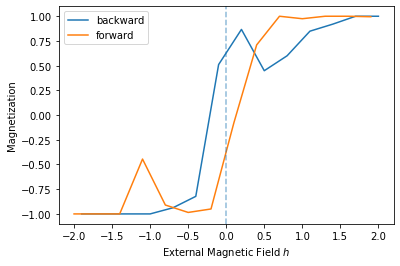

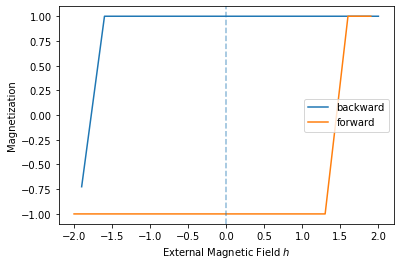

In [6]:
#Create array with increasing h values

h_forward = np.arange(-2, 2, 0.3)
h_forward

def compute_magnetization(x):
    return x.mean()
## initialize spin lattice
    #40
spin_lattice = initialize_spin_lattice(20)  

## create dataframe to hold equilibirum spins for each h
h_forward_df = pd.DataFrame(index=spin_lattice.index, columns=h_forward) 


for i in h_forward:                                         # iterate through the h values
    get_to_equilibrium(df = spin_lattice, T = 3, h = i)     # get to equilibrium
    
    h_forward_df[i] = spin_lattice["spin_value"]
    
## create dataframe to store magnetization values
hf_mag = pd.DataFrame(columns=["Magnetization"],index=h_forward)         

## compute each magnetization for each h value
hf_mag["Magnetization"] = h_forward_df.apply(compute_magnetization)
hf_mag.head() # Contains magnetization for each temperaturewhen h is incremented forward

#Create decreasing h values

h_backward = np.arange(2, -2, -0.3)
h_backward

# Get the magnetization of the lattice as the h value decreases

## initialize spin lattice
#40
spin_lattice = initialize_spin_lattice(15)    

## create dataframe to hold equilibirum spins for each h
h_backward_df = pd.DataFrame(index=spin_lattice.index, columns=h_backward)

for i in h_backward:                                       # iterate through the h values
    get_to_equilibrium(df = spin_lattice, T = 3, h = i)    # get to equilibrium for each h value
    
    h_backward_df[i] = spin_lattice["spin_value"]
    
## create dataframe to store magnetization values   
hb_mag = pd.DataFrame(columns=["Magnetization"],index=h_backward)           

## compute magnetization for each h value
hb_mag["Magnetization"] = h_backward_df.apply(compute_magnetization)
hb_mag.head() # Contains magnetization for each temperature when h is incremented backward

#%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hb_mag.index,hb_mag["Magnetization"],label="backward")
plt.plot(hf_mag.index,hf_mag["Magnetization"],label="forward")
plt.xlabel("External Magnetic Field $h$")
plt.ylabel("Magnetization")
plt.axvline(linestyle='--',alpha=0.5)
plt.legend()
plt.show()

# Get the magnetization of the lattice as the h value increases
#40
spin_lattice = initialize_spin_lattice(15)
h_forward_df_2 = pd.DataFrame(index=spin_lattice.index, columns=h_forward)

for i in h_forward:
    get_to_equilibrium(df = spin_lattice, T = 1, h = i)
    
    h_forward_df_2[i] = spin_lattice["spin_value"]
    

hf_mag_2 = pd.DataFrame(columns=["Magnetization"],index=h_forward)

hf_mag_2["Magnetization"] = h_forward_df_2.apply(compute_magnetization)
# Get the magnetization of the lattice as the h value decreases
#40
spin_lattice = initialize_spin_lattice(20)
h_backward_df_2 = pd.DataFrame(index=spin_lattice.index, columns=h_backward)

for i in h_backward:
    get_to_equilibrium(df = spin_lattice, T = 1, h = i)
    
    h_backward_df_2[i] = spin_lattice["spin_value"]


hb_mag_2 = pd.DataFrame(columns=["Magnetization"],index=h_backward)

hb_mag_2["Magnetization"] = h_backward_df_2.apply(compute_magnetization)

#%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hb_mag_2.index,hb_mag_2["Magnetization"],label="backward")
plt.plot(hf_mag_2.index,hf_mag_2["Magnetization"],label="forward")
plt.xlabel("External Magnetic Field $h$")
plt.ylabel("Magnetization")
plt.axvline(linestyle='--',alpha=0.5)
plt.legend()
plt.show()

0.7096774193548387
0.484375


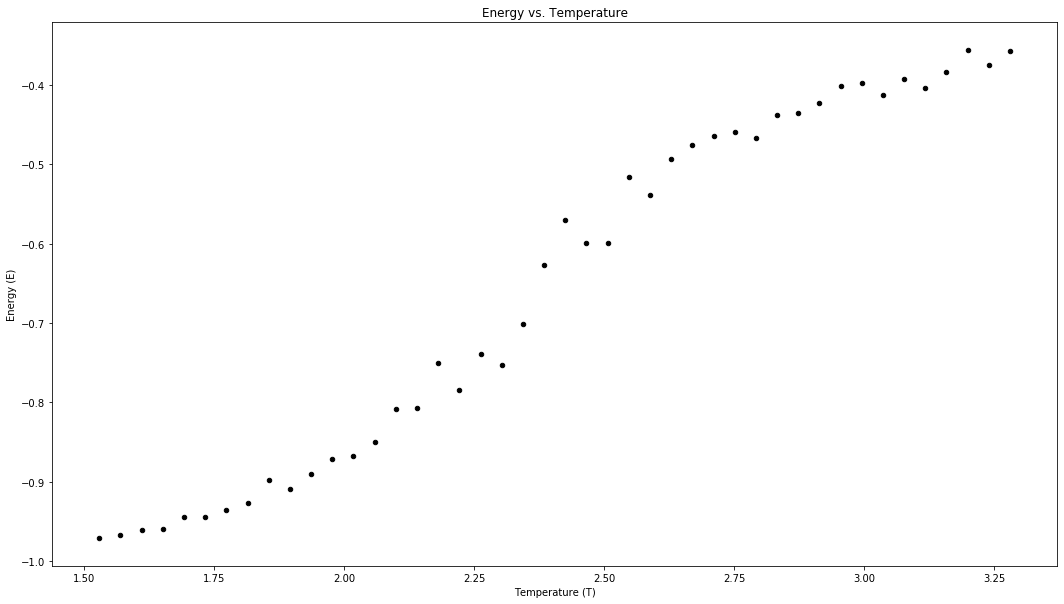

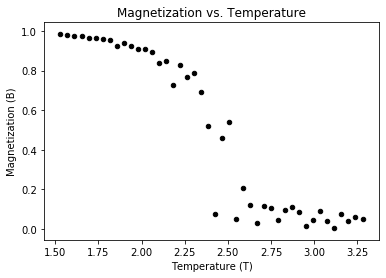

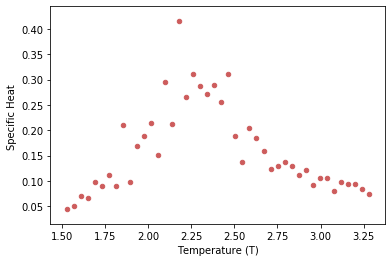

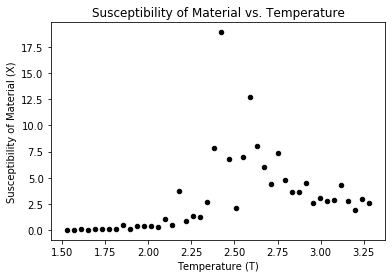

In [20]:
from __future__ import division

import numpy as np

from numpy.random import rand

import matplotlib.pyplot as plt



def initialstate(N):   

    ''' generates a random spin configuration for initial condition'''

    state = 2*np.random.randint(2, size=(N,N))-1

    return state





def mcmove(config, beta):

    '''Monte Carlo move using Metropolis algorithm '''

    for i in range(N):

        for j in range(N):

                a = np.random.randint(0, N)

                b = np.random.randint(0, N)

                s =  config[a, b]

                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]

                cost = 2*s*nb

                if cost < 0:

                    s *= -1

                elif rand() < np.exp(-cost*beta):

                    s *= -1

                config[a, b] = s

    return config





def calcEnergy(config):

    '''Energy of a given configuration'''

    energy = 0

    for i in range(len(config)):

        for j in range(len(config)):

            S = config[i,j]

            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]

            energy += -nb*S

    return energy/4.





def calcMag(config):

    '''Magnetization of a given configuration'''

    mag = np.sum(config)

    return mag



nt      = int(88/2)         #88  number of temperature points

N       = 16         #16  size of the lattice, N x N

eqSteps = int(5000/8)       #1024  number of MC sweeps for equilibration

mcSteps = int(2000/8)       #1024  number of MC sweeps for calculation



T       = np.linspace(1.53, 3.28, nt); 

E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)

n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 

# divide by number of samples, and by system size to get intensive values



for tt in range(nt):

    E1 = M1 = E2 = M2 = 0

    config = initialstate(N)

    iT=1.0/T[tt]; iT2=iT*iT;

    

    for i in range(eqSteps):         # equilibrate

        mcmove(config, iT)           # Monte Carlo moves



    for i in range(mcSteps):

        mcmove(config, iT)           

        Ene = calcEnergy(config)     # calculate the energy

        Mag = calcMag(config)        # calculate the magnetisation



        E1 = E1 + Ene

        M1 = M1 + Mag

        M2 = M2 + Mag*Mag 

        E2 = E2 + Ene*Ene



    E[tt] = n1*E1

    M[tt] = n1*M1

    C[tt] = (n1*E2 - n2*E1*E1)*iT2

    X[tt] = (n1*M2 - n2*M1*M1)*iT

    

f = plt.figure(figsize=(18, 10)); # plot the calculated values    



#sp =  f.add_subplot(2, 2, 1 );

plt.figure(1)

plt.scatter(T, E, s=20, marker='o', color='k')

plt.title("Energy vs. Temperature")

plt.xlabel("Temperature (T)")#, fontsize=20);

plt.ylabel("Energy (E)")#, fontsize=20);         plt.axis('tight');





#sp =  f.add_subplot(2, 2, 2 );

plt.figure(2)

plt.scatter(T, abs(M), s=20, marker='o', color='k')

plt.title("Magnetization vs. Temperature")

plt.xlabel("Temperature (T)")#, fontsize=20); 

plt.ylabel("Magnetization (B)")#, fontsize=20);   plt.axis('tight');





#sp =  f.add_subplot(2, 2, 3 );

plt.figure(3)

plt.scatter(T, C, s=20, marker='o', color='IndianRed')

plt.title('Specific Heat vs Temperature')

plt.xlabel("Temperature (T)")#, fontsize=20);  

plt.ylabel("Specific Heat ")#, fontsize=20);   plt.axis('tight');   





#sp =  f.add_subplot(2, 2, 4 );

plt.figure(4)

plt.scatter(T, X, s=20, marker='o', color='k')

plt.title("Susceptibility of Material vs. Temperature")

plt.xlabel("Temperature (T)") 

plt.ylabel("Susceptibility of Material (X)")



    

neighb = 0

total = 0



for i in np.arange(0,15):

    for j in np.arange(0,15):

        if config[i,j] == 1:

            if config[i,j+1] == 1:

                neighb += 1

            total += 1



for i in np.arange(0,15):

    for j in np.arange(0,15):

        if config[i,j] == 1:

            if config[i,j-1] == 1:

                neighb += 1

            total += 1



for i in np.arange(0,15):

    for j in np.arange(0,15):

        if config[i,j] == 1:

            if config[i+1,j] == 1:

                neighb += 1

            total += 1



for i in np.arange(0,15):

    for j in np.arange(0,15):

        if config[i,j] == 1:

            if config[i,j-1] == 1:

                neighb += 1

            total += 1



print(neighb/total)



spin1 = 0



for i in np.arange(0,15):

    for j in np.arange(0,15):

        if config[i,j] == 1:

            spin1 += 1



Total = 16*16

print(spin1/Total)

Text(0, 0.5, 'Susceptibility of Material (X)')

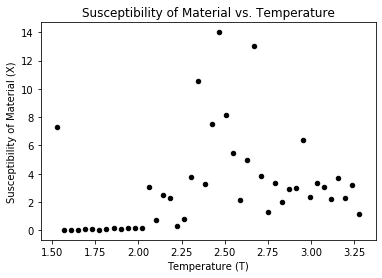

In [18]:
plt.figure(4)

plt.scatter(T, X, s=20, marker='o', color='k')

plt.title("Susceptibility of Material vs. Temperature")

plt.xlabel("Temperature (T)") 

plt.ylabel("Susceptibility of Material (X)")

Text(0, 0.5, 'Specific Heat ')

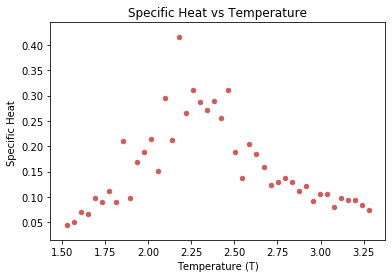

In [21]:
plt.figure(3)

plt.scatter(T, C, s=20, marker='o', color='IndianRed')

plt.title('Specific Heat vs Temperature')

plt.xlabel("Temperature (T)")#, fontsize=20);  

plt.ylabel("Specific Heat ")#, fontsize=20);   plt.axis('tight');   


[(0, 0), (1, 5.7), (2, 3), (3, 7), (0.5, 9), (3, 5), (9, 1), (10, 5)]
**********
[0.0]
**********
[0.0, 5.78705]
**********
[0.0, 5.78705, 3.60555]
**********
[0.0, 5.78705, 3.60555, 7.61577]
**********
[0.0, 5.78705, 3.60555, 7.61577, 9.01388]
**********
[0.0, 5.78705, 3.60555, 7.61577, 9.01388, 5.83095]
**********
[0.0, 5.78705, 3.60555, 7.61577, 9.01388, 5.83095, 9.05539]
**********
[0.0, 5.78705, 3.60555, 7.61577, 9.01388, 5.83095, 9.05539, 11.18034]
**********
[5.78705]
**********
[5.78705, 0.0]
**********
[5.78705, 0.0, 2.87924]
**********
[5.78705, 0.0, 2.87924, 2.38537]
**********
[5.78705, 0.0, 2.87924, 2.38537, 3.33766]
**********
[5.78705, 0.0, 2.87924, 2.38537, 3.33766, 2.11896]
**********
[5.78705, 0.0, 2.87924, 2.38537, 3.33766, 2.11896, 9.27847]
**********
[5.78705, 0.0, 2.87924, 2.38537, 3.33766, 2.11896, 9.27847, 9.02718]
**********
[3.60555]
**********
[3.60555, 2.87924]
**********
[3.60555, 2.87924, 0.0]
**********
[3.60555, 2.87924, 0.0, 4.12311]
**********
[3.60555

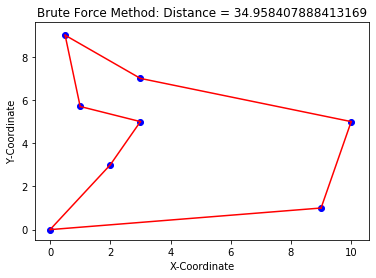

In [27]:
import itertools #ALEX SENT THIS #ALEX SENT THIS #ALEX SENT THIS #ALEX SENT THIS #ALEX SENT THIS
import random
import numpy as np
import matplotlib.pyplot as plt


coords = [(0,0), (1,5.7), (2,3), (3,7), (0.5,9), (3,5), (9,1), (10,5)]
# from scipy.spatial import distance

def distance(x1, y1, x2, y2):
    d = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    return d


#coords = [(random.random()*25.0, random.random()*25.0) for _ in range(8)]
#coords = [(x, y) for _ in range(7)]

print(coords)
cLen = len(coords)
# print(coords[0][1])
distanceList = []
for i in range(cLen):
    # if coords[i] is not coords[-1]:
    x1 = coords[i][0]
    y1 = coords[i][1]

    dist = []


    for c in coords:
        x2 = c[0]
        y2 = c[1]
        print("**********")
        # print(x1, y1)
        # print(x2, y2)
        dd = round(distance(x1, y1, x2, y2), 5)
        dist.append(dd)
        print(dist)
    distanceList.append(dist)


    # else:
    #     x1 = coords[i][0]
    #     y1 = coords[i][1]
    #     # x2 = coords[i+1][0]
# print(distanceList)

print("&^&^&^&")
print(distanceList)



distances = [[0, 15, 20, 50, 100],
             [10, 0, 100, 25, 2],
             [15, 35, 0, 10, 30],
             [0, 25, 30, 0, 6],
             [8, 9, 10, 20, 0]]


#graphs = list(range(0,cLen))
graphs = (range(0,cLen))

permutations_object = itertools.permutations(graphs)

#permutations_list = list(permutations_object)
permutations_list = (permutations_object)


# print(permutations_list)

# print(permutations_list[0][1])
zero = (0,)
walkings = []
for list in permutations_list:
    list = zero + list
    walkings.append(list)

print('********')
# print(walkings)


minWeight = 10000
minWalk = None
for walk in walkings:
    weight = 0
    # print('walk', str(walk))
    for i in range(len(walk)):
    # for town in walk:
    #     print(weight)
        if walk[i] != walk[-1]:
            # print('town', str(walk[i]))
            # print('weight', str(weight))
            add = (distanceList[walk[i]][walk[i + 1]])
            # if walk[i]
            weight += add
        else:
            weight += (distanceList[walk[i]][walk[0]])
    # print (weight)
    if weight < minWeight:
        minWeight = weight
        minWalk = walk


print('*******************')
print(minWeight)
print(minWalk)

#idea
#****make random coordinates,
# get distances for every walk by dist formula
#use that as dist matrix

for i in range(cLen):

    x1 = coords[minWalk[i]][0]
    y1 = coords[minWalk[i]][1]
    plt.scatter(x1, y1, c='blue')

    # if minWalk[i] != minWalk[-1]:
    x2 = coords[minWalk[i+1]][0]
    y2 = coords[minWalk[i+1]][1]

    # else:
    #     x2 = coords[minWalk[0]][0]
    #     y2 = coords[minWalk[0]][1]

    xPts = [x1, x2]
    yPts = [y1, y2]

    plt.plot(xPts, yPts, c='red')
plt.plot([coords[0][0], coords[minWalk[-1]][0]], [coords[0][1], coords[minWalk[-1]][1]])
plt.title("Brute Force Method: Distance = 34.958407888413169")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
plt.show()

In [33]:
from scipy import *
from pylab import *

def Distance(R1, R2):
   return np.sqrt((R1[0]-R2[0])**2+(R1[1]-R2[1])**2)

def TotalDistance(city, R):
   dist=0
   for i in range(len(city)-1):
       dist += Distance(R[city[i]],R[city[i+1]])
   dist += Distance(R[city[-1]],R[city[0]])
   return dist

def reverse(city, n):
   nct = len(city)
   nn = (1+ ((n[1]-n[0]) % nct))/2 # half the lenght of the segment to be reversed
   # the segment is reversed in the following way n[0]<->n[1], n[0]+1<->n[1]-1, n[0]+2<->n[1]-2,...
   # Start at the ends of the segment and swap pairs of cities, moving towards the center.
   for j in range(int(nn)):
       k = (n[0]+j) % nct
       l = (n[1]-j) % nct
       (city[k],city[l]) = (city[l],city[k])  # swap

def transpt(city, n):
   nct = len(city)

   newcity=[]
   # Segment in the range n[0]...n[1]
   for j in range( (n[1]-n[0])%nct + 1):
       newcity.append(city[ (j+n[0])%nct ])
   # is followed by segment n[5]...n[2]
   for j in range( (n[2]-n[5])%nct + 1):
       newcity.append(city[ (j+n[5])%nct ])
   # is followed by segment n[3]...n[4]
   for j in range( (n[4]-n[3])%nct + 1):
       newcity.append(city[ (j+n[3])%nct ])
   return newcity
COUNT=0
def Plot(city, R, dist):
   # Plot
   global COUNT
   Pt = [R[city[i]] for i in range(len(city))]
   Pt += [R[city[0]]]
   Pt = np.array(Pt)
   plt.title('Total distance='+str(dist)) #CHANGE LABEL CHANGE LABEL CHANGE LABEL
   plt.xlabel('X Coordinate') #CHANGE LABEL CHANGE LABEL CHANGE LABEL
   plt.ylabel('Y Coordinate') #CHANGE LABEL CHANGE LABEL CHANGE LABEL
   plt.plot(Pt[:,0], Pt[:,1], '-o')
   fig1=plt.gcf()
   fig1.savefig('newer'+str(COUNT)+'.png')
   fig1.clf()
   fig1=0
   COUNT=COUNT +1


if __name__=='__main__':

   ncity = 8   # Number of cities to visit #CHANGE THIS CHANGE THIS CHANGE THIS
   maxTsteps = 50    # Temperature is lowered not more than maxTsteps #CHANGE THIS CHANGE THIS CHANGE THIS
   Tstart = 0.2       # Starting temperature - has to be high enough
   fCool = 0.9        # Factor to multiply temperature at each cooling step
   maxSteps = 100*ncity     # Number of steps at constant temperature
   maxAccepted = 10*ncity   # Number of accepted steps at constant temperature

   Preverse = 0.5      # How often to choose reverse/transpose trial move

   # Choosing city coordinates
   R=[[0, 0], [1, 5.7], [2, 3], [3, 7],
              [0.5, 9], [3, 5], [9, 1], [10, 5]]  # coordinates of cities are choosen randomly
   
   #for i in range(ncity):
   #    R.append( [np.random.rand(),np.random.rand()] )
   #R = np.array(R)

   # The index table -- the order the cities are visited.
   city = range(ncity)
   # Distance of the travel at the beginning
   dist = TotalDistance(city, R)

   # Stores points of a move
   n = np.zeros(6, dtype=int)
   nct = len(R) # number of cities

   T = Tstart # temperature

   Plot(city, R, dist)

   for t in range(maxTsteps):  # Over temperature

       accepted = 0
       for i in range(maxSteps): # At each temperature, many Monte Carlo steps

           while True: # Will find two random cities sufficiently close by
               # Two cities n[0] and n[1] are choosen at random
               n[0] = int((nct)*np.random.rand())     # select one city
               n[1] = int((nct-1)*np.random.rand())   # select another city, but not the same
               if (n[1] >= n[0]): n[1] += 1   #
               if (n[1] < n[0]): (n[0],n[1]) = (n[1],n[0]) # swap, because it must be: n[0]<n[1]
               nn = (n[0]+nct -n[1]-1) % nct  # number of cities not on the segment n[0]..n[1]
               if nn>=3: break

           # We want to have one index before and one after the two cities
           # The order hence is [n2,n0,n1,n3]
           n[2] = (n[0]-1) % nct  # index before n0  -- see figure in the lecture notes
           n[3] = (n[1]+1) % nct  # index after n2   -- see figure in the lecture notes

           if Preverse > np.random.rand(): 
               # Here we reverse a segment
               # What would be the cost to reverse the path between city[n[0]]-city[n[1]]?
               de = Distance(R[city[n[2]]],R[city[n[1]]]) + Distance(R[city[n[3]]],R[city[n[0]]]) - Distance(R[city[n[2]]],R[city[n[0]]]) - Distance(R[city[n[3]]],R[city[n[1]]])

               if de<0 or np.exp(-de/T)>np.random.rand(): # Metropolis
                   accepted += 1
                   dist += de
                   reverse(city, n)
           else:
               # Here we transpose a segment
               nc = (n[1]+1+ int(np.random.rand()*(nn-1)))%nct  # Another point outside n[0],n[1] segment. See picture in lecture nodes!
               n[4] = nc
               n[5] = (nc+1) % nct

               # Cost to transpose a segment
               de = -Distance(R[city[n[1]]],R[city[n[3]]]) - Distance(R[city[n[0]]],R[city[n[2]]]) - Distance(R[city[n[4]]],R[city[n[5]]])
               de += Distance(R[city[n[0]]],R[city[n[4]]]) + Distance(R[city[n[1]]],R[city[n[5]]]) + Distance(R[city[n[2]]],R[city[n[3]]])

               if de<0 or np.exp(-de/T)>np.random.rand(): # Metropolis
                   accepted += 1
                   dist += de
                   city = transpt(city, n)

           if accepted > maxAccepted: break

       # Plot

       Plot(city, R, dist)

       #print "T=%10.5f , distance= %10.5f , accepted steps= %d" #(T, dist, accepted)
       T *= fCool             # The system is cooled down
       if accepted == 0: break  # If the path does not want to change any more, we can stop


   Plot(city, R, dist) #THIS IS LINDSAYS CODE #USE THIS CODE FOR SIMULATED ANNEALING

TypeError: 'range' object does not support item assignment

<Figure size 432x288 with 0 Axes>